In [1]:
import numpy as np
import pandas as pd
import requests as req
import seaborn as sns

import matplotlib.pyplot as plt


In [2]:
# load data
pd.options.display.max_columns = None
fires = pd.read_csv("WFIGS_-_Wildland_Fire_Perimeters_Full_History.csv")
fires = fires[['irwin_ControlDateTime','irwin_ContainmentDateTime','irwin_FireDiscoveryDateTime','irwin_POOState','irwin_PredominantFuelModel','irwin_FireCauseGeneral','irwin_DiscoveryAcres','irwin_InitialLatitude','irwin_InitialLongitude']]
fires

/var/folders/qy/3rw6vnbs5j7dxjy7txkb9cgm0000gn/T/ipykernel_87205/1782409729.py:3: DtypeWarning: Columns (40,69,72) have mixed types. Specify dtype option on import or set low_memory=False.
  fires = pd.read_csv("WFIGS_-_Wildland_Fire_Perimeters_Full_History.csv")


,irwin_ControlDateTime,irwin_ContainmentDateTime,irwin_FireDiscoveryDateTime,irwin_POOState,irwin_PredominantFuelModel,irwin_FireCauseGeneral,irwin_DiscoveryAcres,irwin_InitialLatitude,irwin_InitialLongitude
0,2020/12/31 22:15:00+00,2020/11/15 23:00:00+00,2020/10/18 19:24:00+00,US-CA,NaN,NaN,1.0,36.07114,-121.45050
1,2020/05/01 20:39:00+00,2020/05/01 20:39:00+00,2020/05/01 18:56:59+00,US-NV,GR1,Cause and Origin Not Identified,0.1,39.55669,-119.55850
2,2020/08/20 18:24:59+00,2020/08/08 23:25:00+00,2020/08/08 22:24:00+00,US-AZ,GS2,Other Human Cause,0.3,33.29384,-110.45000
3,2020/05/08 18:00:00+00,2020/05/08 07:02:00+00,2020/05/08 01:44:00+00,US-NV,GS1,Firearms/Weapons,44.0,35.87582,-115.20410
4,NaN,NaN,2020/08/21 19:44:59+00,US-SD,GR2,Utilities,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
10070,NaN,2022/04/29 19:27:54+00,2022/04/28 20:46:47+00,US-TX,NaN,NaN,150.0,35.92950,-100.81450
10071,NaN,2022/04/28 20:00:59+00,2022/04/28 18:25:00+00,US-MI,NaN,NaN,0.1,44.36604,-85.93725
10072,NaN,NaN,2022/04/29 12:00:09+00,US-MA,NaN,NaN,20.0,NaN,NaN
10073,NaN,NaN,2022/04/28 20:27:00+00,US-NM,NaN,NaN,2.0,35.90856,-106.60350


In [3]:
# fillna with values from another column

fires['irwin_ControlDateTime'].fillna(fires['irwin_ContainmentDateTime'], inplace=True)
fires['irwin_ControlDateTime'].fillna(fires['irwin_FireDiscoveryDateTime'], inplace=True)
fires['irwin_DiscoveryAcres'].fillna(fires['irwin_DiscoveryAcres'].mean(), inplace=True)

fires.isnull().sum()

irwin_ControlDateTime             0
irwin_ContainmentDateTime      1640
irwin_FireDiscoveryDateTime       0
irwin_POOState                    0
irwin_PredominantFuelModel     2357
irwin_FireCauseGeneral         1214
irwin_DiscoveryAcres              0
irwin_InitialLatitude          1734
irwin_InitialLongitude         1734
dtype: int64

In [4]:
#convert DATETIME columns to datetime formula
fires['YEAR'] = pd.to_datetime(fires['irwin_FireDiscoveryDateTime']).dt.year
fires['DiscoveryDate'] = pd.to_datetime(fires['irwin_FireDiscoveryDateTime']).dt.date
fires['irwin_FireDiscoveryDateTime']=pd.to_datetime(fires['irwin_FireDiscoveryDateTime'], format="%Y-%m-%d %H:%M:%S")
fires['irwin_ControlDateTime']=pd.to_datetime(fires['irwin_ControlDateTime'], format="%Y-%m-%d %H:%M:%S")
fires.head()

,irwin_ControlDateTime,irwin_ContainmentDateTime,irwin_FireDiscoveryDateTime,irwin_POOState,irwin_PredominantFuelModel,irwin_FireCauseGeneral,irwin_DiscoveryAcres,irwin_InitialLatitude,irwin_InitialLongitude,YEAR,DiscoveryDate
0,2020-12-31 22:15:00+00:00,2020/11/15 23:00:00+00,2020-10-18 19:24:00+00:00,US-CA,NaN,NaN,1.000000,36.07114,-121.4505,2020,2020-10-18
1,2020-05-01 20:39:00+00:00,2020/05/01 20:39:00+00,2020-05-01 18:56:59+00:00,US-NV,GR1,Cause and Origin Not Identified,0.100000,39.55669,-119.5585,2020,2020-05-01
2,2020-08-20 18:24:59+00:00,2020/08/08 23:25:00+00,2020-08-08 22:24:00+00:00,US-AZ,GS2,Other Human Cause,0.300000,33.29384,-110.4500,2020,2020-08-08
3,2020-05-08 18:00:00+00:00,2020/05/08 07:02:00+00,2020-05-08 01:44:00+00:00,US-NV,GS1,Firearms/Weapons,44.000000,35.87582,-115.2041,2020,2020-05-08
4,2020-08-21 19:44:59+00:00,NaN,2020-08-21 19:44:59+00:00,US-SD,GR2,Utilities,73.227003,NaN,NaN,2020,2020-08-21


In [5]:
#add a column to calculate how long the fire was burning
fires["Fire_Duration"]=(fires['irwin_ControlDateTime'] - fires['irwin_FireDiscoveryDateTime'])/pd.Timedelta(hours=1)
fires

,irwin_ControlDateTime,irwin_ContainmentDateTime,irwin_FireDiscoveryDateTime,irwin_POOState,irwin_PredominantFuelModel,irwin_FireCauseGeneral,irwin_DiscoveryAcres,irwin_InitialLatitude,irwin_InitialLongitude,YEAR,DiscoveryDate,Fire_Duration
0,2020-12-31 22:15:00+00:00,2020/11/15 23:00:00+00,2020-10-18 19:24:00+00:00,US-CA,NaN,NaN,1.000000,36.07114,-121.45050,2020,2020-10-18,1778.850000
1,2020-05-01 20:39:00+00:00,2020/05/01 20:39:00+00,2020-05-01 18:56:59+00:00,US-NV,GR1,Cause and Origin Not Identified,0.100000,39.55669,-119.55850,2020,2020-05-01,1.700278
2,2020-08-20 18:24:59+00:00,2020/08/08 23:25:00+00,2020-08-08 22:24:00+00:00,US-AZ,GS2,Other Human Cause,0.300000,33.29384,-110.45000,2020,2020-08-08,284.016389
3,2020-05-08 18:00:00+00:00,2020/05/08 07:02:00+00,2020-05-08 01:44:00+00:00,US-NV,GS1,Firearms/Weapons,44.000000,35.87582,-115.20410,2020,2020-05-08,16.266667
4,2020-08-21 19:44:59+00:00,NaN,2020-08-21 19:44:59+00:00,US-SD,GR2,Utilities,73.227003,NaN,NaN,2020,2020-08-21,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
10070,2022-04-29 19:27:54+00:00,2022/04/29 19:27:54+00,2022-04-28 20:46:47+00:00,US-TX,NaN,NaN,150.000000,35.92950,-100.81450,2022,2022-04-28,22.685278
10071,2022-04-28 20:00:59+00:00,2022/04/28 20:00:59+00,2022-04-28 18:25:00+00:00,US-MI,NaN,NaN,0.100000,44.36604,-85.93725,2022,2022-04-28,1.599722
10072,2022-04-29 12:00:09+00:00,NaN,2022-04-29 12:00:09+00:00,US-MA,NaN,NaN,20.000000,NaN,NaN,2022,2022-04-29,0.000000
10073,2022-04-28 20:27:00+00:00,NaN,2022-04-28 20:27:00+00:00,US-NM,NaN,NaN,2.000000,35.90856,-106.60350,2022,2022-04-28,0.000000


array([[<AxesSubplot:title={'center':'irwin_ControlDateTime'}>,
        <AxesSubplot:title={'center':'irwin_FireDiscoveryDateTime'}>,
        <AxesSubplot:title={'center':'irwin_DiscoveryAcres'}>],
       [<AxesSubplot:title={'center':'irwin_InitialLatitude'}>,
        <AxesSubplot:title={'center':'irwin_InitialLongitude'}>,
        <AxesSubplot:title={'center':'YEAR'}>],
       [<AxesSubplot:title={'center':'Fire_Duration'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

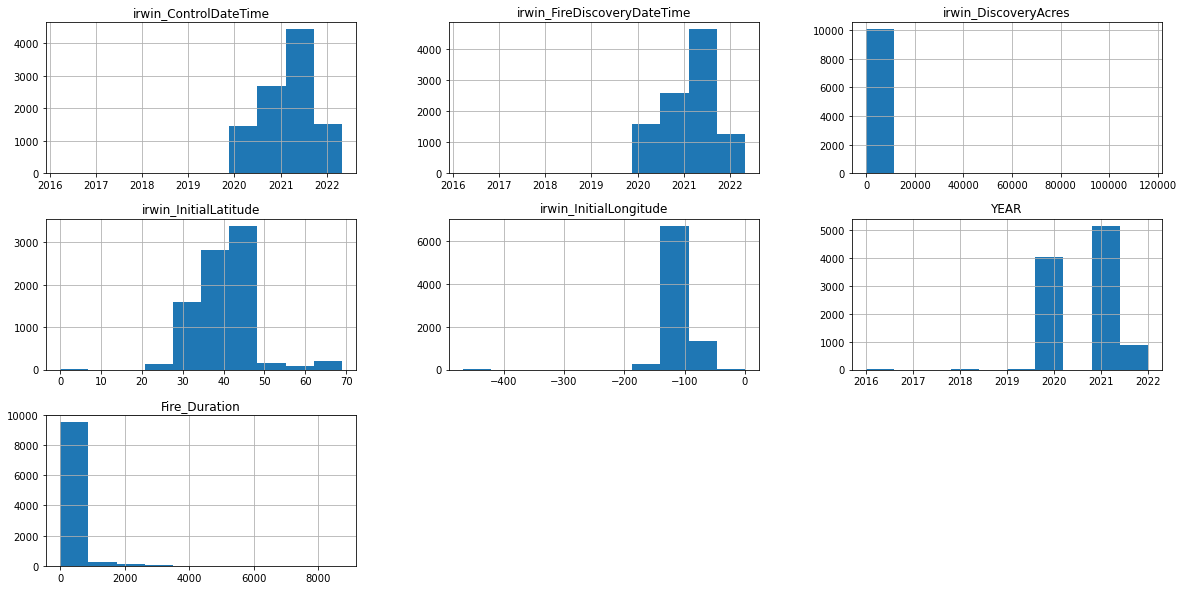

In [6]:
# Histogram for all features

fires.hist(figsize=[20,10])

In [7]:
# Set and Classify Fire Sizes - https://www.nwcg.gov/term/glossary/size-class-of-fire
# Smaller buckets were used to better handle the skew in small fires vs large fires
fires.loc[fires['irwin_DiscoveryAcres'] <= .25, 'fire_severity'] = 1
fires.loc[(fires['irwin_DiscoveryAcres'] > .25) & (fires['irwin_DiscoveryAcres'] <= 300), 'fire_severity'] = 2
fires.loc[fires['irwin_DiscoveryAcres'] > 300, 'fire_severity'] = 3          
print(fires['fire_severity'].value_counts())

2.0    7140
1.0    2717
3.0     218
Name: fire_severity, dtype: int64


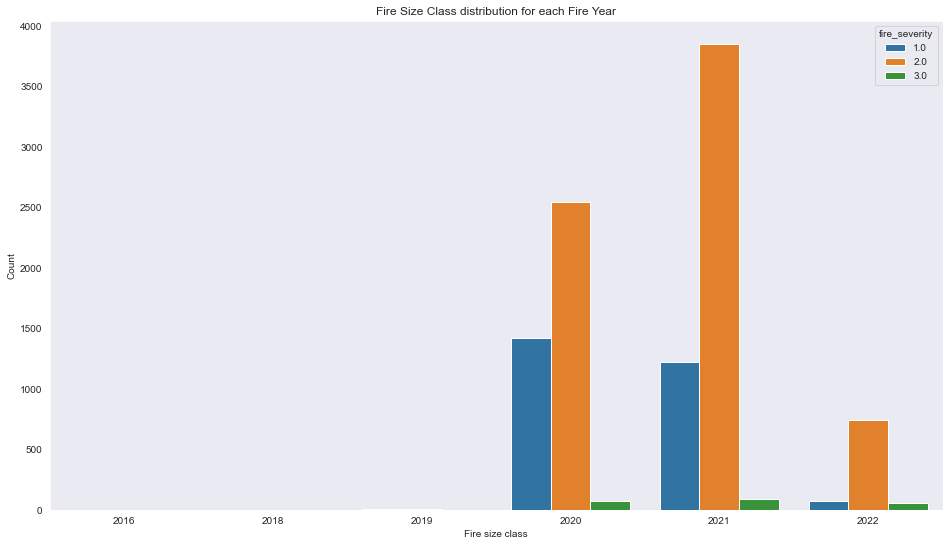

In [8]:
plt.figure(figsize=(16,9), facecolor='white')
sns.set_style("dark")
sns.countplot(x ='YEAR', hue = "fire_severity", data = fires) 
plt.xlabel('Fire size class')
plt.ylabel('Count')
plt.title('Fire Size Class distribution for each Fire Year')
plt.show()

In [9]:
fires.irwin_FireCauseGeneral.unique()

array([nan, 'Cause and Origin Not Identified', 'Other Human Cause',
       'Firearms/Weapons', 'Utilities', 'Incendiary',
       'Debris/Open Burning', 'Lightning', 'Camping', 'Railroad',
       'Equipment', 'Investigated but Undetermined', 'Coal Seam',
       'Undetermined', 'Smoking', 'Other Natural Cause',
       'Power generation/transmission/distribution', 'Other causes',
       'Undetermined (remarks required)', 'Equipment and vehicle use',
       'Debris and open burning', 'Railroad operations and maintenance',
       'Natural', 'Arson', 'Recreation and ceremony',
       'Misuse of fire by a minor'], dtype=object)

In [10]:
# General Fire Cause to numerica values
fires['irwin_FireCauseGeneral'] = fires['irwin_FireCauseGeneral'].replace(['Arson','Incendiary','Other Human Cause','Debris/Open Burning','Equipment','Camping','Utilities','Undetermined','Firearms/Weapons','Investigated but Undetermined',
                                                                           'Cause and Origin Not Identified','Coal Seam','Railroad','Smoking','Debris and open burning','Power generation/transmission/distribution',
                                                                           'Undetermined (remarks required)','Equipment and vehicle use','Railroad operations and maintenance','Recreation and ceremony'],'1')
fires['irwin_FireCauseGeneral'] = fires['irwin_FireCauseGeneral'].replace(['Lightning','Other Natural Cause', 'Natural'],'2')
fires['irwin_FireCauseGeneral'] = fires['irwin_FireCauseGeneral'].replace(['Undetermined','Misuse of fire by a minor', 'Other causes'],'3')

# Legend For General Cause
# 1 = Human
# 2 = Nature
# 3 = Uncategorized


In [11]:
# Import LE to convert Fuel Model and General Cause to Numeric Values
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# Converting Fuel Model to Numeric
label_encoder = LabelEncoder()
fires["fueltype_num"] = label_encoder.fit_transform(fires["irwin_PredominantFuelModel"])

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [13]:
fires_binary_encoded = pd.get_dummies(fires, columns=["irwin_PredominantFuelModel", "irwin_FireCauseGeneral"])
fires_binary_encoded.head()

,irwin_ControlDateTime,irwin_ContainmentDateTime,irwin_FireDiscoveryDateTime,irwin_POOState,irwin_DiscoveryAcres,irwin_InitialLatitude,irwin_InitialLongitude,YEAR,DiscoveryDate,Fire_Duration,fire_severity,fueltype_num,irwin_PredominantFuelModel_GR1,irwin_PredominantFuelModel_GR2,irwin_PredominantFuelModel_GR3,irwin_PredominantFuelModel_GR4,irwin_PredominantFuelModel_GR5,irwin_PredominantFuelModel_GR6,irwin_PredominantFuelModel_GR7,irwin_PredominantFuelModel_GR8,irwin_PredominantFuelModel_GR9,irwin_PredominantFuelModel_GS1,irwin_PredominantFuelModel_GS2,irwin_PredominantFuelModel_GS3,irwin_PredominantFuelModel_GS4,irwin_PredominantFuelModel_SB1,irwin_PredominantFuelModel_SB2,irwin_PredominantFuelModel_SB3,irwin_PredominantFuelModel_SB4,irwin_PredominantFuelModel_SH1,irwin_PredominantFuelModel_SH2,irwin_PredominantFuelModel_SH3,irwin_PredominantFuelModel_SH4,irwin_PredominantFuelModel_SH5,irwin_PredominantFuelModel_SH6,irwin_PredominantFuelModel_SH7,irwin_PredominantFuelModel_SH8,irwin_PredominantFuelModel_SH9,irwin_PredominantFuelModel_TL1,irwin_PredominantFuelModel_TL2,irwin_PredominantFuelModel_TL3,irwin_PredominantFuelModel_TL4,irwin_PredominantFuelModel_TL5,irwin_PredominantFuelModel_TL6,irwin_PredominantFuelModel_TL7,irwin_PredominantFuelModel_TL8,irwin_PredominantFuelModel_TL9,irwin_PredominantFuelModel_TU1,irwin_PredominantFuelModel_TU2,irwin_PredominantFuelModel_TU3,irwin_PredominantFuelModel_TU4,irwin_PredominantFuelModel_TU5,irwin_FireCauseGeneral_1,irwin_FireCauseGeneral_2,irwin_FireCauseGeneral_3
0,2020-12-31 22:15:00+00:00,2020/11/15 23:00:00+00,2020-10-18 19:24:00+00:00,US-CA,1.000000,36.07114,-121.4505,2020,2020-10-18,1778.850000,2.0,40,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2020-05-01 20:39:00+00:00,2020/05/01 20:39:00+00,2020-05-01 18:56:59+00:00,US-NV,0.100000,39.55669,-119.5585,2020,2020-05-01,1.700278,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,2020-08-20 18:24:59+00:00,2020/08/08 23:25:00+00,2020-08-08 22:24:00+00:00,US-AZ,0.300000,33.29384,-110.4500,2020,2020-08-08,284.016389,2.0,10,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,2020-05-08 18:00:00+00:00,2020/05/08 07:02:00+00,2020-05-08 01:44:00+00:00,US-NV,44.000000,35.87582,-115.2041,2020,2020-05-08,16.266667,2.0,9,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,2020-08-21 19:44:59+00:00,NaN,2020-08-21 19:44:59+00:00,US-SD,73.227003,NaN,NaN,2020,2020-08-21,0.000000,2.0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [14]:
fires_binary_encoded = fires_binary_encoded.drop(['fueltype_num','irwin_ControlDateTime','irwin_ContainmentDateTime','irwin_FireDiscoveryDateTime','irwin_DiscoveryAcres','irwin_InitialLatitude','irwin_InitialLongitude','YEAR','DiscoveryDate','irwin_POOState','Fire_Duration'], axis=1)
fires_binary_encoded.head()

,fire_severity,irwin_PredominantFuelModel_GR1,irwin_PredominantFuelModel_GR2,irwin_PredominantFuelModel_GR3,irwin_PredominantFuelModel_GR4,irwin_PredominantFuelModel_GR5,irwin_PredominantFuelModel_GR6,irwin_PredominantFuelModel_GR7,irwin_PredominantFuelModel_GR8,irwin_PredominantFuelModel_GR9,irwin_PredominantFuelModel_GS1,irwin_PredominantFuelModel_GS2,irwin_PredominantFuelModel_GS3,irwin_PredominantFuelModel_GS4,irwin_PredominantFuelModel_SB1,irwin_PredominantFuelModel_SB2,irwin_PredominantFuelModel_SB3,irwin_PredominantFuelModel_SB4,irwin_PredominantFuelModel_SH1,irwin_PredominantFuelModel_SH2,irwin_PredominantFuelModel_SH3,irwin_PredominantFuelModel_SH4,irwin_PredominantFuelModel_SH5,irwin_PredominantFuelModel_SH6,irwin_PredominantFuelModel_SH7,irwin_PredominantFuelModel_SH8,irwin_PredominantFuelModel_SH9,irwin_PredominantFuelModel_TL1,irwin_PredominantFuelModel_TL2,irwin_PredominantFuelModel_TL3,irwin_PredominantFuelModel_TL4,irwin_PredominantFuelModel_TL5,irwin_PredominantFuelModel_TL6,irwin_PredominantFuelModel_TL7,irwin_PredominantFuelModel_TL8,irwin_PredominantFuelModel_TL9,irwin_PredominantFuelModel_TU1,irwin_PredominantFuelModel_TU2,irwin_PredominantFuelModel_TU3,irwin_PredominantFuelModel_TU4,irwin_PredominantFuelModel_TU5,irwin_FireCauseGeneral_1,irwin_FireCauseGeneral_2,irwin_FireCauseGeneral_3
0,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,2.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,2.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,2.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [15]:
# Define the features set.
X = fires_binary_encoded
X = X.drop("fire_severity", axis=1)
X.head()

,irwin_PredominantFuelModel_GR1,irwin_PredominantFuelModel_GR2,irwin_PredominantFuelModel_GR3,irwin_PredominantFuelModel_GR4,irwin_PredominantFuelModel_GR5,irwin_PredominantFuelModel_GR6,irwin_PredominantFuelModel_GR7,irwin_PredominantFuelModel_GR8,irwin_PredominantFuelModel_GR9,irwin_PredominantFuelModel_GS1,irwin_PredominantFuelModel_GS2,irwin_PredominantFuelModel_GS3,irwin_PredominantFuelModel_GS4,irwin_PredominantFuelModel_SB1,irwin_PredominantFuelModel_SB2,irwin_PredominantFuelModel_SB3,irwin_PredominantFuelModel_SB4,irwin_PredominantFuelModel_SH1,irwin_PredominantFuelModel_SH2,irwin_PredominantFuelModel_SH3,irwin_PredominantFuelModel_SH4,irwin_PredominantFuelModel_SH5,irwin_PredominantFuelModel_SH6,irwin_PredominantFuelModel_SH7,irwin_PredominantFuelModel_SH8,irwin_PredominantFuelModel_SH9,irwin_PredominantFuelModel_TL1,irwin_PredominantFuelModel_TL2,irwin_PredominantFuelModel_TL3,irwin_PredominantFuelModel_TL4,irwin_PredominantFuelModel_TL5,irwin_PredominantFuelModel_TL6,irwin_PredominantFuelModel_TL7,irwin_PredominantFuelModel_TL8,irwin_PredominantFuelModel_TL9,irwin_PredominantFuelModel_TU1,irwin_PredominantFuelModel_TU2,irwin_PredominantFuelModel_TU3,irwin_PredominantFuelModel_TU4,irwin_PredominantFuelModel_TU5,irwin_FireCauseGeneral_1,irwin_FireCauseGeneral_2,irwin_FireCauseGeneral_3
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [16]:
# Define the target set.
y = fires_binary_encoded["fire_severity"].ravel()
y[:5]

array([2., 1., 2., 2., 2.])

In [17]:
# Splitting into Train and Test sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [18]:
# Creating a StandardScaler instance.
scaler = StandardScaler()
# Fitting the Standard Scaler with the training data.
X_scaler = scaler.fit(X_train)

# Scaling the data.
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [19]:
# Create a random forest classifier.
rf_model = RandomForestClassifier(n_estimators=100, random_state=78) 

In [20]:
# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

In [21]:
predictions = rf_model.predict(X_test_scaled)

In [22]:
predictions

array([2., 2., 2., ..., 2., 2., 2.])

In [23]:
# Calculate feature importance in the Random Forest model.
importances = rf_model.feature_importances_
importances

array([0.06053395, 0.02584488, 0.01756127, 0.00848438, 0.00700237,
       0.00885988, 0.00601903, 0.01907423, 0.00575414, 0.03886894,
       0.08390894, 0.01913401, 0.01725137, 0.01541794, 0.0053782 ,
       0.00516274, 0.00250781, 0.01592783, 0.06569308, 0.00979451,
       0.01748486, 0.03447159, 0.00933076, 0.00712315, 0.02286173,
       0.00503844, 0.03510107, 0.00896913, 0.01023718, 0.00835412,
       0.01683634, 0.08325749, 0.01023223, 0.01314918, 0.02809383,
       0.03713218, 0.00815699, 0.01041575, 0.00572328, 0.01441822,
       0.06689124, 0.10133026, 0.00721148])

In [24]:
# Features Sorted by Importance
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)

[(0.10133026236354406, 'irwin_FireCauseGeneral_2'),
 (0.08390893555346217, 'irwin_PredominantFuelModel_GS2'),
 (0.08325748767366158, 'irwin_PredominantFuelModel_TL6'),
 (0.06689123715522717, 'irwin_FireCauseGeneral_1'),
 (0.06569308243421626, 'irwin_PredominantFuelModel_SH2'),
 (0.060533953645289615, 'irwin_PredominantFuelModel_GR1'),
 (0.038868941515241666, 'irwin_PredominantFuelModel_GS1'),
 (0.037132177900589355, 'irwin_PredominantFuelModel_TU1'),
 (0.03510106529036844, 'irwin_PredominantFuelModel_TL1'),
 (0.03447158540032649, 'irwin_PredominantFuelModel_SH5'),
 (0.028093832082538205, 'irwin_PredominantFuelModel_TL9'),
 (0.025844880091301915, 'irwin_PredominantFuelModel_GR2'),
 (0.02286173491980294, 'irwin_PredominantFuelModel_SH8'),
 (0.019134014214793483, 'irwin_PredominantFuelModel_GS3'),
 (0.019074234380008694, 'irwin_PredominantFuelModel_GR8'),
 (0.0175612658782458, 'irwin_PredominantFuelModel_GR3'),
 (0.017484862308010985, 'irwin_PredominantFuelModel_SH4'),
 (0.017251367689315

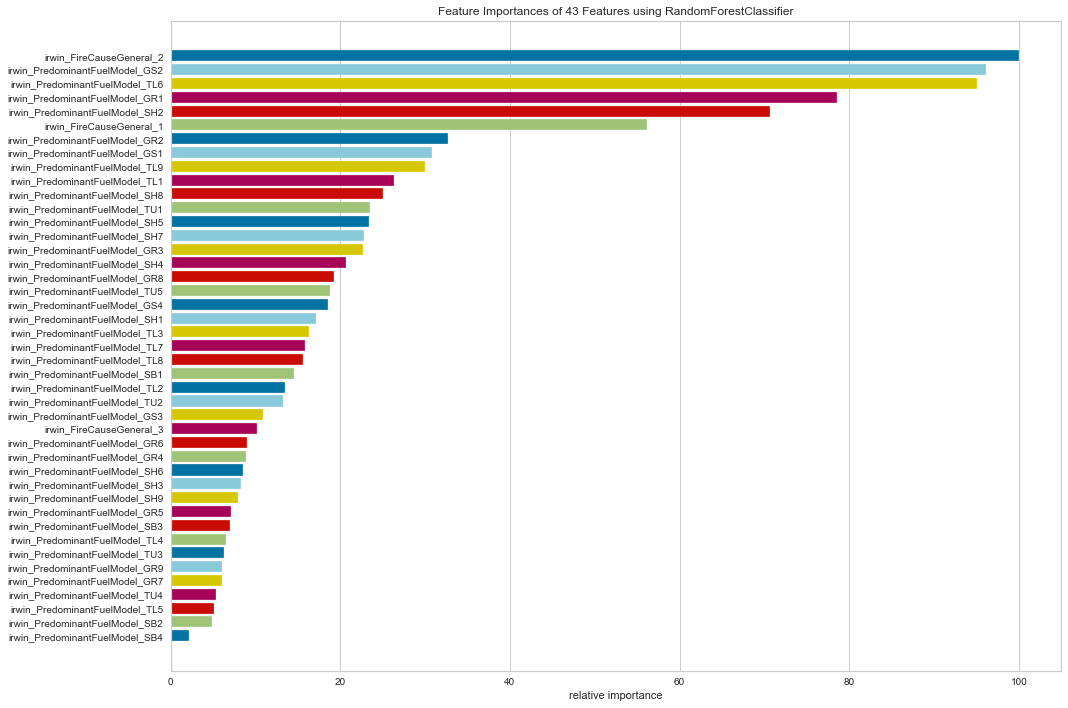

<AxesSubplot:title={'center':'Feature Importances of 43 Features using RandomForestClassifier'}, xlabel='relative importance'>

In [25]:
from sklearn.ensemble import RandomForestClassifier
from yellowbrick.features import FeatureImportances

model = RandomForestClassifier(n_estimators=10)
viz = FeatureImportances(model, size=(1080, 720))

viz.fit(X, y)
# Note: the FeatureImportances visualizer is a model visualizer,
# not a feature visualizer, so it doesn't have a transform method!
viz.show()

In [26]:
# Conusion Matrix to predict fire severity 
cm = confusion_matrix(y_test, predictions)
# DataFrame from the confusion matrix.
cm_df = pd.DataFrame(cm, index=["Class 1","Class 2","Class 3",], columns=["Predicted 1", "Predicted 2","Predicted 3"])
cm_df

#Class 1 - one-quarter acre or less;
#Class 2 - more than one-quarter acre, but less than 300 acres;
#Class 3 - 300 acres or more.

,Predicted 1,Predicted 2,Predicted 3
Class 1,7,638,0
Class 2,9,1794,3
Class 3,0,67,1


In [27]:
# Calculating the accuracy score.
acc_score = accuracy_score(y_test, predictions)

In [28]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 1,Predicted 2,Predicted 3
Class 1,7,638,0
Class 2,9,1794,3
Class 3,0,67,1


Accuracy Score : 0.7153632393807067
Classification Report
              precision    recall  f1-score   support

         1.0       0.44      0.01      0.02       645
         2.0       0.72      0.99      0.83      1806
         3.0       0.25      0.01      0.03        68

    accuracy                           0.72      2519
   macro avg       0.47      0.34      0.29      2519
weighted avg       0.63      0.72      0.60      2519



In [29]:
from imblearn.combine import SMOTEENN

fires_smoteen = fires.drop(['irwin_ControlDateTime','irwin_ContainmentDateTime','irwin_FireDiscoveryDateTime','irwin_POOState','irwin_PredominantFuelModel','irwin_InitialLatitude','irwin_InitialLongitude','irwin_FireCauseGeneral','DiscoveryDate'], axis=1)
fires_smoteen.head()

,irwin_DiscoveryAcres,YEAR,Fire_Duration,fire_severity,fueltype_num
0,1.000000,2020,1778.850000,2.0,40
1,0.100000,2020,1.700278,1.0,0
2,0.300000,2020,284.016389,2.0,10
3,44.000000,2020,16.266667,2.0,9
4,73.227003,2020,0.000000,2.0,1


In [30]:
x_cols = [i for i in fires_smoteen.columns if i not in ('fire_severity')]
X = fires_smoteen[x_cols]
y = fires_smoteen['fire_severity']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

In [32]:
# Creating a StandardScaler instance.
scaler = StandardScaler()
# Fitting the Standard Scaler with the training data.
X_scaler = scaler.fit(X_train)

# Scaling the data.
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [33]:
smoteenn = SMOTEENN(random_state=1)
X_resampled, y_resampled = smoteenn.fit_resample(X_train_scaled, y_train)
y_resampled.value_counts()

3.0    5334
1.0    3546
2.0    3198
Name: fire_severity, dtype: int64

In [34]:
from sklearn.linear_model import LogisticRegression

smoteen_model = LogisticRegression(solver='lbfgs',max_iter=100)
smoteen_model.fit(X_resampled, y_resampled)

LogisticRegression()

In [35]:
from sklearn.metrics import confusion_matrix

y_pred = smoteen_model.predict(X_test_scaled)
confusion_matrix(y_test, y_pred)

array([[ 383,  296,    0],
       [ 640, 1132,   13],
       [   0,    0,   55]])

In [36]:
from sklearn.metrics import balanced_accuracy_score

y_pred = smoteen_model.predict(X_test_scaled)
balanced_accuracy_score(y_test, y_pred)

0.7327461568819968

In [37]:
# Display the confusion matrix
smoteen_cm = confusion_matrix(y_test, y_pred)
# DataFrame from the confusion matrix.
smoteen_cm_df = pd.DataFrame(cm, index=["Class 1", "Class 2","Class 3"], columns=["Predicted 1", "Predicted 2","Predicted 3"])
smoteen_cm_df

,Predicted 1,Predicted 2,Predicted 3
Class 1,7,638,0
Class 2,9,1794,3
Class 3,0,67,1


In [38]:
from imblearn.metrics import classification_report_imbalanced

print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

        1.0       0.37      0.56      0.65      0.45      0.61      0.36       679
        2.0       0.79      0.63      0.60      0.70      0.62      0.38      1785
        3.0       0.81      1.00      0.99      0.89      1.00      1.00        55

avg / total       0.68      0.62      0.62      0.64      0.62      0.39      2519

